<a href="https://colab.research.google.com/github/Vincent-bayes/MSc-Project-Code/blob/main/Final_Project_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AY0e-g48r3IPJuzjIQkMkvUVOkUnQ_J9KQY-xULleDXFw265iivsqhwv6gM
Mounted at /content/gdrive


In [ ]:
!pip -qq install catboost

     |████████████████████████████████| 69.2MB 41kB/s 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sn
sn.set_theme(color_codes=True)
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import joblib
from mpl_toolkits.mplot3d import Axes3D 
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split, KFold, GroupKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from tqdm import tqdm_notebook
from sklearn.utils import shuffle
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import scale
from time import time
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error
import matplotlib.animation as animation
from IPython.display import HTML
from keras import backend as K
import warnings
warnings.filterwarnings("ignore")


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/dataa.csv')
print(df.columns)
cdf = df[[ 'RH2M', 'PS', 'T2M_MAX', 'WS10M_RANGE',
       'WS10M_MIN', 'WS10M_MAX', 'WS10M', 'T2M', 'SST','PRECIP']]
cdf.head()

Index(['LAT', 'LON', 'YEAR', 'DOY', 'RH2M', 'PS', 'T2M_MAX', 'WS10M_RANGE',
       'WS10M_MIN', 'WS10M_MAX', 'WS10M', 'T2M', 'SST', 'PRECIP', 'CHIRPS'],
      dtype='object')


,RH2M,PS,T2M_MAX,WS10M_RANGE,WS10M_MIN,WS10M_MAX,WS10M,T2M,SST,PRECIP
0,64.960,84.834,26.934,2.918,0.620,3.540,2.172,21.700,27.5790,4.128
1,62.536,84.954,27.382,4.018,0.876,4.896,2.796,21.750,28.0790,0.836
2,67.602,84.892,26.598,3.082,0.562,3.644,1.952,21.744,28.3800,3.954
3,66.372,84.864,27.334,4.264,0.624,4.890,2.660,21.920,28.0525,5.686
4,57.580,84.876,28.274,5.968,0.456,6.424,3.322,22.360,27.9575,0.300


In [ ]:
cdf.shape

(2849, 10)

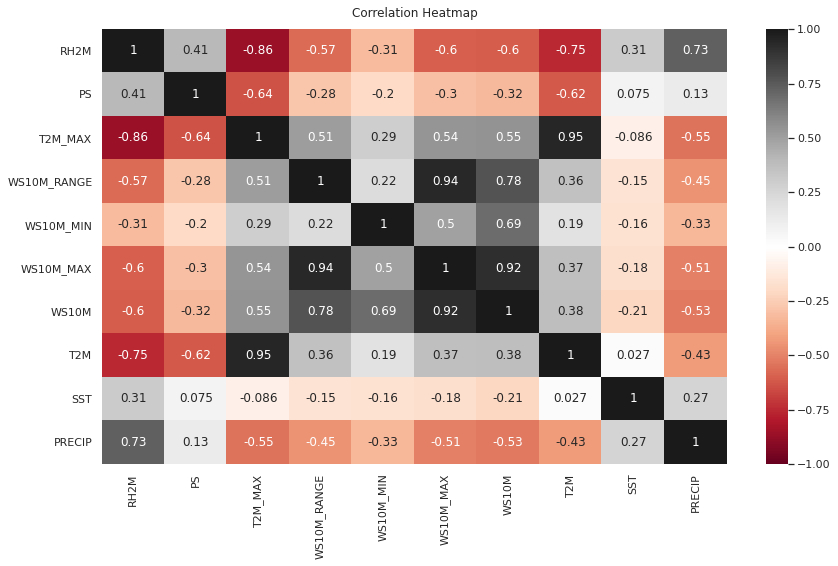

In [ ]:
correlation = cdf.corr(method= 'spearman', min_periods=1)

plt.figure(figsize=(14, 8))

heatmap = sn.heatmap(correlation, vmin=-1, vmax=1, annot=True,cmap ='RdGy')

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

## Step Akaike Information Criterion

In [ ]:
def forward_selected(cdf, PRECIP):
    remaining = set(cdf.columns)
    remaining.remove(PRECIP)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} ".format(PRECIP,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, cdf).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} ".format(PRECIP,
                                   ' + '.join(selected))
    model = smf.ols(formula, cdf).fit()
 
    return model

def main():
    model = forward_selected(cdf, 'PRECIP')
 
    print(model.model.formula)
    print(model.params)
    print(model.rsquared_adj)
    
 
if __name__ == '__main__':
    main()

PRECIP ~ RH2M + PS + T2M + SST + T2M_MAX 
Intercept    844.055318
RH2M           0.348986
PS           -10.372179
T2M            1.141029
SST            0.456045
T2M_MAX       -0.677496
dtype: float64
0.47174441508796805


## Scikitlearn Models

In [ ]:
cdff = cdf[['RH2M','PS','T2M','SST','T2M_MAX','PRECIP']]
cdff.head()

,RH2M,PS,T2M,SST,T2M_MAX,PRECIP
0,64.960,84.834,21.700,27.5790,26.934,4.128
1,62.536,84.954,21.750,28.0790,27.382,0.836
2,67.602,84.892,21.744,28.3800,26.598,3.954
3,66.372,84.864,21.920,28.0525,27.334,5.686
4,57.580,84.876,22.360,27.9575,28.274,0.300


>knn -2.336 (0.126)
>cart -2.881 (0.173)
>svm -2.259 (0.105)


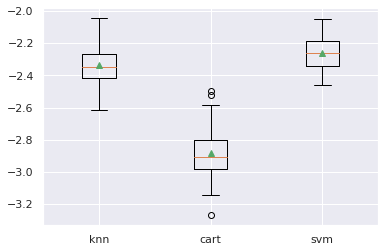

In [ ]:
# compare machine learning models for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from matplotlib import pyplot

# get a list of models to evaluate
def get_models():
	models = dict()
	models['knn'] = KNeighborsRegressor()
	models['cart'] = DecisionTreeRegressor()
	models['svm'] = SVR()
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
	return scores

# define dataset
X = cdff.loc[:, cdff.columns != 'PRECIP']
y = cdff.loc[:, 'PRECIP']
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

## Multiple Linear regression Model

In [ ]:
msk = np.random.rand(len(cdff)) < 0.8
train = cdff[msk]
test = cdff[~msk]

regr = linear_model.LinearRegression()
X = np.asanyarray(train[['RH2M','PS','T2M','SST','T2M_MAX']])
y = np.asanyarray(train[['PRECIP']])
regr.fit (X, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

print('############################################################################################')

y_hat= regr.predict(test[['RH2M','PS','T2M','SST','T2M_MAX']])
X = np.asanyarray(test[['RH2M','PS','T2M','SST','T2M_MAX']])
y = np.asanyarray(test[['PRECIP']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
r2 = regr.score(X, y)
print('Variance score: %.2f' % r2)

Coefficients:  [[  0.34775717 -10.47975313   1.12024826   0.46914626  -0.68783199]]
############################################################################################
Residual sum of squares: 9.09
Variance score: 0.54


## Spearman's Rank Correlation

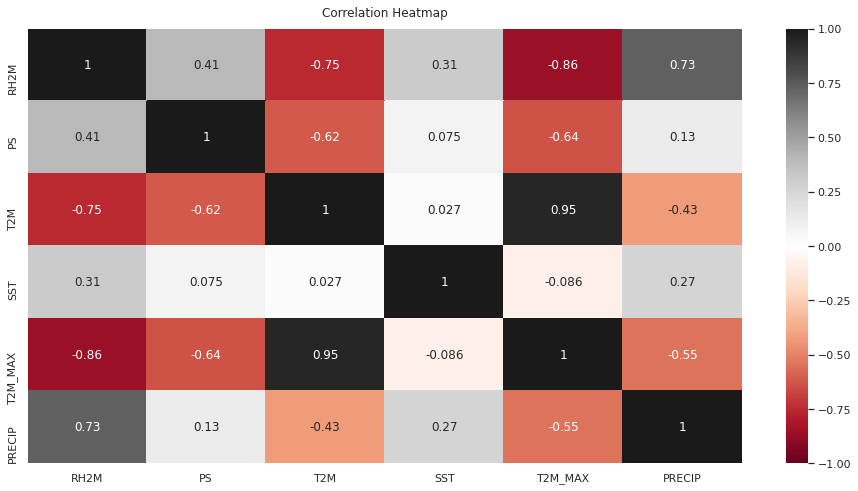

In [ ]:
correlation1 = cdff.corr(method = "spearman")

plt.figure(figsize=(16, 8))

heatmap = sn.heatmap(correlation1, vmin=-1, vmax=1, annot=True, cmap ='RdGy')

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

## Scatter Plots

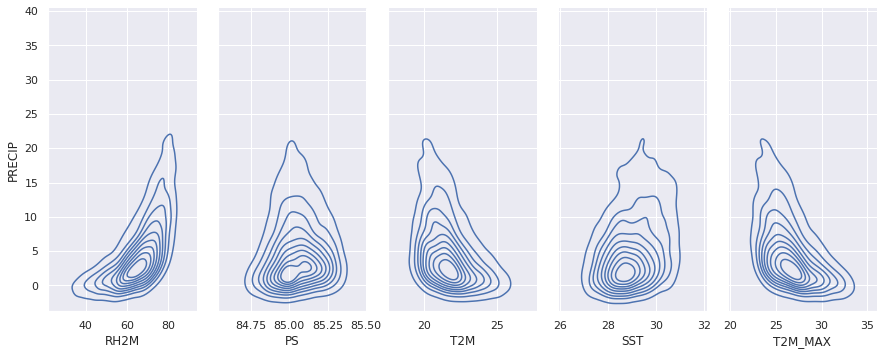

In [ ]:
sn.pairplot(cdff, x_vars=['RH2M','PS','T2M','SST','T2M_MAX'], y_vars=["PRECIP"],
             height=5, aspect=.5, kind="kde");

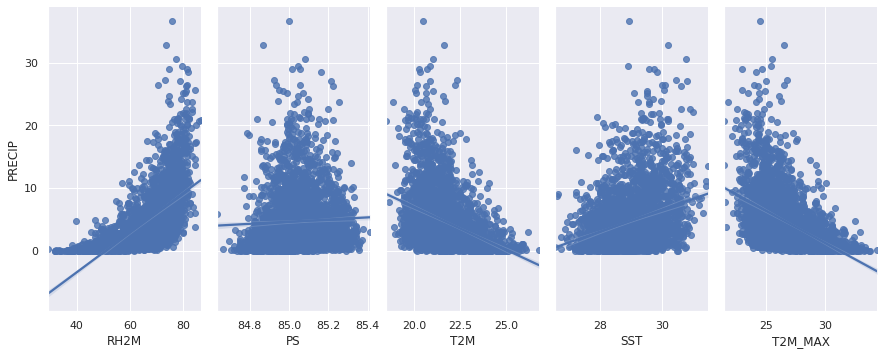

In [ ]:
sn.pairplot(cdff, x_vars=['RH2M','PS','T2M','SST','T2M_MAX'], y_vars=["PRECIP"],
             height=5, aspect=.5, kind="reg");

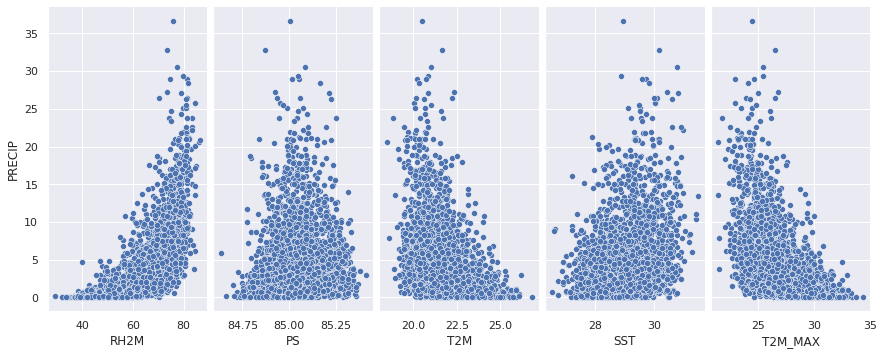

In [ ]:
sn.pairplot(cdff, x_vars=['RH2M','PS','T2M','SST','T2M_MAX'], y_vars=["PRECIP"],
             height=5, aspect=.5, diag_kind="hist");

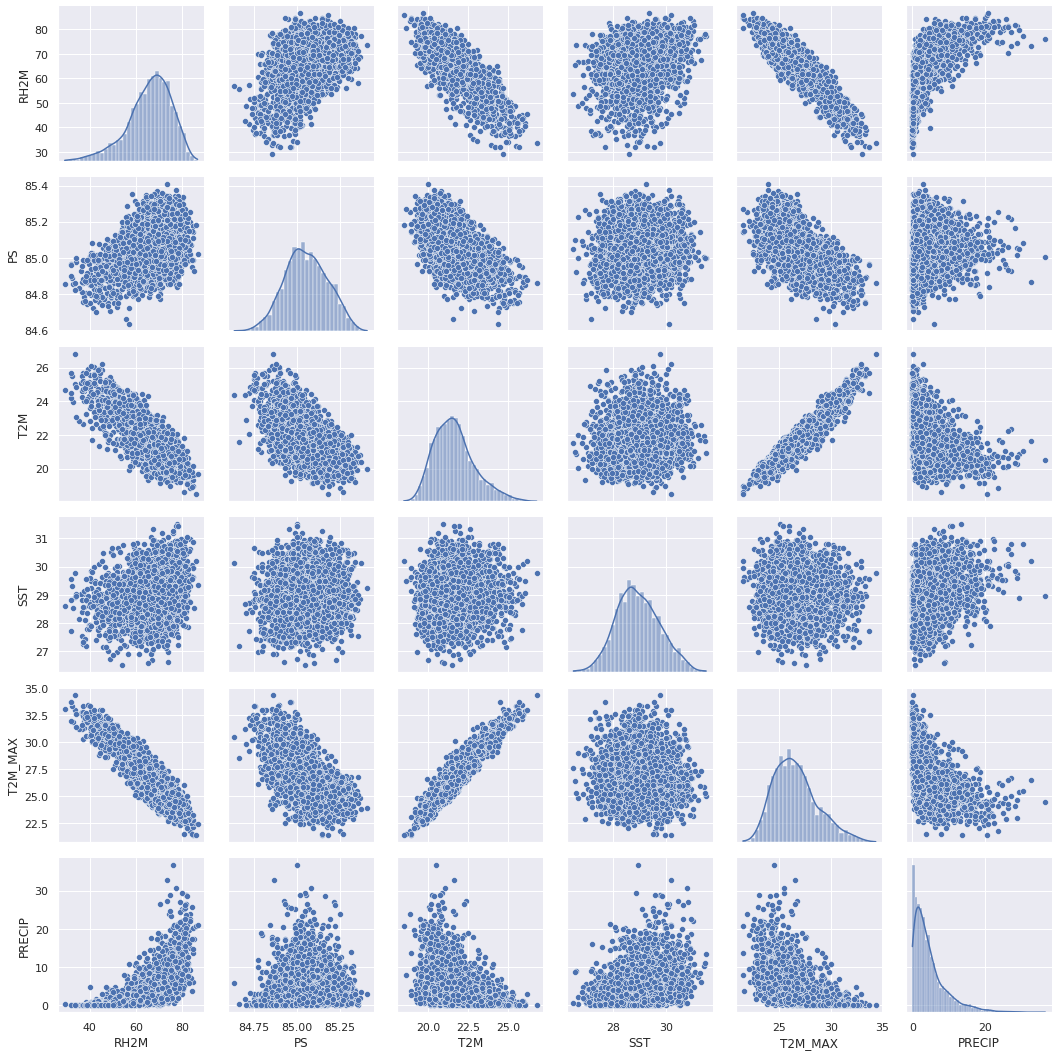

In [ ]:
g = sn.PairGrid(cdff)
g.map_diag(sn.histplot,kde=True)
g.map_offdiag(sn.scatterplot)

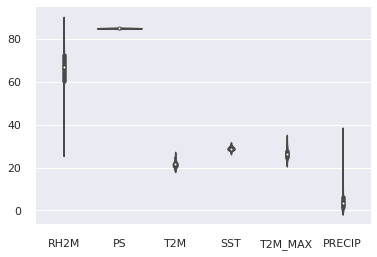

In [ ]:
f, ax = plt.subplots()
sn.violinplot(data=cdff)
sn.despine(offset=5, trim=True);

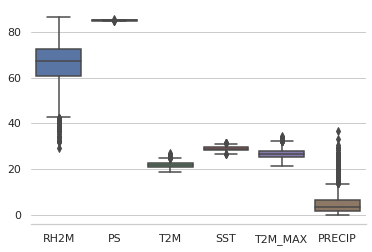

In [ ]:
sn.set_style("whitegrid")
sn.boxplot(data=cdff, palette="deep")
sn.despine(left=True)

In [ ]:
features = cdff.drop(['PRECIP'], axis=1)
labels = cdff['PRECIP']

X_train, X_test, y_train, y_test = train_test_split(features,labels, test_size=0.2,random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test,y_test, test_size=0.5,random_state=42)

In [ ]:
for dataset in(y_train,y_val,y_test):
    print(round(len(dataset)/len(labels),2))

0.8
0.1
0.1


In [ ]:
X_train.to_csv('train_features.csv', index=False)
X_val.to_csv('val_features.csv', index=False)
X_test.to_csv('test_features.csv', index=False)

y_train.to_csv('train_labels.csv', index=False)
y_val.to_csv('val_labels.csv', index=False)
y_test.to_csv('test_labels.csv', index=False)

In [ ]:
tr_features = pd.read_csv('train_features.csv')
tr_labels = pd.read_csv('train_labels.csv')

## Linear Regression Model

In [ ]:
print(linear_model.LinearRegression())
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [ ]:
mlr = linear_model.LinearRegression()
parameters = {
    'copy_X':['True','False'],
    'fit_intercept': ['True','False'],
    'n_jobs': ['None',[1,3,5,10]]
}
cv = GridSearchCV(mlr,parameters,cv=5)
cv.fit(features,labels.values.ravel())

print_results(cv)

BEST PARAMS: {'copy_X': 'True', 'fit_intercept': 'True', 'n_jobs': 'None'}

0.454 (+/-0.056) for {'copy_X': 'True', 'fit_intercept': 'True', 'n_jobs': 'None'}
0.454 (+/-0.056) for {'copy_X': 'True', 'fit_intercept': 'True', 'n_jobs': [1, 3, 5, 10]}
0.454 (+/-0.056) for {'copy_X': 'True', 'fit_intercept': 'False', 'n_jobs': 'None'}
0.454 (+/-0.056) for {'copy_X': 'True', 'fit_intercept': 'False', 'n_jobs': [1, 3, 5, 10]}
0.454 (+/-0.056) for {'copy_X': 'False', 'fit_intercept': 'True', 'n_jobs': 'None'}
0.454 (+/-0.056) for {'copy_X': 'False', 'fit_intercept': 'True', 'n_jobs': [1, 3, 5, 10]}
0.454 (+/-0.056) for {'copy_X': 'False', 'fit_intercept': 'False', 'n_jobs': 'None'}
0.454 (+/-0.056) for {'copy_X': 'False', 'fit_intercept': 'False', 'n_jobs': [1, 3, 5, 10]}


In [ ]:
cv.best_estimator_

LinearRegression(copy_X='True', fit_intercept='True', n_jobs='None',
                 normalize=False)

In [ ]:
joblib.dump(cv.best_estimator_,'MLR_model.pkl')

['MLR_model.pkl']

## Multi Layer Perceptron

In [ ]:
print(MLPRegressor())
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)


In [ ]:
mlp = MLPRegressor()
parameters = {
    'hidden_layer_sizes': [(10,),(50,),(100,)],
    'activation': ['relu','tanh','logistic'],
    'learning_rate': ['constant','invscaling','adaptive']
}
cv1 = GridSearchCV(mlp,parameters,cv=5)
cv1.fit(features,labels.values.ravel())

print_results(cv1)

BEST PARAMS: {'activation': 'tanh', 'hidden_layer_sizes': (50,), 'learning_rate': 'invscaling'}

0.456 (+/-0.081) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'constant'}
0.376 (+/-0.118) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'invscaling'}
0.473 (+/-0.094) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'adaptive'}
0.497 (+/-0.061) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant'}
0.492 (+/-0.042) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'invscaling'}
0.475 (+/-0.094) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive'}
0.511 (+/-0.021) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}
0.517 (+/-0.053) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'invscaling'}
0.51 (+/-0.051) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learn

In [ ]:
cv1.best_estimator_

MLPRegressor(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(50,), learning_rate='invscaling',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [ ]:
joblib.dump(cv1.best_estimator_,'MLP_model.pkl')

['MLP_model.pkl']

## Random Forest Regressor

In [ ]:
print(RandomForestRegressor())
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)


In [ ]:
rf = RandomForestRegressor()
parameters = {
    'n_estimators': [10,50,200,400],
    'max_depth': [2,4,8,16,None]
}
cv2 = GridSearchCV(rf,parameters,cv=5)
cv2.fit(features,labels.values.ravel())
print_results(cv2)

BEST PARAMS: {'max_depth': 4, 'n_estimators': 50}

0.475 (+/-0.021) for {'max_depth': 2, 'n_estimators': 10}
0.48 (+/-0.011) for {'max_depth': 2, 'n_estimators': 50}
0.477 (+/-0.015) for {'max_depth': 2, 'n_estimators': 200}
0.478 (+/-0.015) for {'max_depth': 2, 'n_estimators': 400}
0.544 (+/-0.026) for {'max_depth': 4, 'n_estimators': 10}
0.553 (+/-0.018) for {'max_depth': 4, 'n_estimators': 50}
0.551 (+/-0.011) for {'max_depth': 4, 'n_estimators': 200}
0.552 (+/-0.012) for {'max_depth': 4, 'n_estimators': 400}
0.534 (+/-0.037) for {'max_depth': 8, 'n_estimators': 10}
0.539 (+/-0.036) for {'max_depth': 8, 'n_estimators': 50}
0.548 (+/-0.029) for {'max_depth': 8, 'n_estimators': 200}
0.549 (+/-0.03) for {'max_depth': 8, 'n_estimators': 400}
0.494 (+/-0.033) for {'max_depth': 16, 'n_estimators': 10}
0.527 (+/-0.043) for {'max_depth': 16, 'n_estimators': 50}
0.528 (+/-0.035) for {'max_depth': 16, 'n_estimators': 200}
0.531 (+/-0.038) for {'max_depth': 16, 'n_estimators': 400}
0.496 (+/-0

In [ ]:
cv2.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=4, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
joblib.dump(cv2.best_estimator_,'RF_model.pkl')

['RF_model.pkl']

## Gradient Boosted Trees

In [ ]:
print(GradientBoostingRegressor())
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [ ]:
gb = GradientBoostingRegressor()
parameters = {
    'n_estimators': [5,50,200,400],
    'max_depth': [1,3,5,7,9],
    'learning_rate': [0.01,0.1,1]
}
cv3 = GridSearchCV(gb,parameters,cv=5)
cv3.fit(features,labels.values.ravel())

print_results(cv3)

BEST PARAMS: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 400}

0.017 (+/-0.035) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.214 (+/-0.043) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.425 (+/-0.024) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 200}
0.487 (+/-0.015) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 400}
0.036 (+/-0.038) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.329 (+/-0.06) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.543 (+/-0.026) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
0.555 (+/-0.022) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 400}
0.042 (+/-0.034) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5}
0.355 (+/-0.045) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
0.546 (+/-0.021) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200}
0.548 (+/-0.024) for {'learning_r

In [ ]:
cv3.best_estimator_

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=400,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
joblib.dump(cv3.best_estimator_,'GB_model.pkl')

['GB_model.pkl']

## LGBM Regressor

In [ ]:
print(LGBMRegressor())
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [ ]:
LGBM = LGBMRegressor()
parameters = {
    'n_estimators': [50,200,400,1000],
    'max_depth': [1,3,5,7,9],
    'learning_rate': [0.01,0.1,1]
}
cv4 = GridSearchCV(LGBM,parameters,cv=5)
cv4.fit(features,labels.values.ravel())

print_results(cv4)

BEST PARAMS: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}

0.214 (+/-0.046) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.426 (+/-0.025) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 200}
0.487 (+/-0.015) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 400}
0.527 (+/-0.01) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 1000}
0.33 (+/-0.063) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.538 (+/-0.032) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
0.555 (+/-0.013) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 400}
0.557 (+/-0.012) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 1000}
0.351 (+/-0.077) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
0.546 (+/-0.032) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200}
0.549 (+/-0.011) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 400}
0.542 (+/-0.02) for {'learni

In [ ]:
cv4.best_estimator_

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=3,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=50, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
joblib.dump(cv4.best_estimator_,'LGBM_model.pkl')

['LGBM_model.pkl']

## HistGradienBoosting Regressor

In [ ]:
 print(HistGradientBoostingRegressor())
 def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

HistGradientBoostingRegressor(l2_regularization=0.0, learning_rate=0.1,
                              loss='least_squares', max_bins=255,
                              max_depth=None, max_iter=100, max_leaf_nodes=31,
                              min_samples_leaf=20, n_iter_no_change=None,
                              random_state=None, scoring=None, tol=1e-07,
                              validation_fraction=0.1, verbose=0,
                              warm_start=False)


In [ ]:
HGBR = HistGradientBoostingRegressor()
parameters = {
    'learning_rate': [0.01,0.1,1],
    'max_depth':['None',1,2,3,4]
}
cv5 = GridSearchCV(HGBR,parameters,cv=10)
cv5.fit(features,labels.values.ravel())

print_results(cv5)

BEST PARAMS: {'learning_rate': 0.1, 'max_depth': 2}

nan (+/-nan) for {'learning_rate': 0.01, 'max_depth': 'None'}
nan (+/-nan) for {'learning_rate': 0.01, 'max_depth': 1}
0.418 (+/-0.074) for {'learning_rate': 0.01, 'max_depth': 2}
0.466 (+/-0.084) for {'learning_rate': 0.01, 'max_depth': 3}
0.478 (+/-0.091) for {'learning_rate': 0.01, 'max_depth': 4}
nan (+/-nan) for {'learning_rate': 0.1, 'max_depth': 'None'}
nan (+/-nan) for {'learning_rate': 0.1, 'max_depth': 1}
0.562 (+/-0.075) for {'learning_rate': 0.1, 'max_depth': 2}
0.557 (+/-0.078) for {'learning_rate': 0.1, 'max_depth': 3}
0.55 (+/-0.093) for {'learning_rate': 0.1, 'max_depth': 4}
nan (+/-nan) for {'learning_rate': 1, 'max_depth': 'None'}
nan (+/-nan) for {'learning_rate': 1, 'max_depth': 1}
0.474 (+/-0.11) for {'learning_rate': 1, 'max_depth': 2}
0.4 (+/-0.162) for {'learning_rate': 1, 'max_depth': 3}
0.347 (+/-0.124) for {'learning_rate': 1, 'max_depth': 4}


In [ ]:
cv5.best_estimator_

HistGradientBoostingRegressor(l2_regularization=0.0, learning_rate=0.1,
                              loss='least_squares', max_bins=255, max_depth=2,
                              max_iter=100, max_leaf_nodes=31,
                              min_samples_leaf=20, n_iter_no_change=None,
                              random_state=None, scoring=None, tol=1e-07,
                              validation_fraction=0.1, verbose=0,
                              warm_start=False)

In [ ]:
joblib.dump(cv5.best_estimator_,'HGBR_model.pkl')

['HGBR_model.pkl']

In [ ]:
val_features = pd.read_csv('val_features.csv')
val_labels = pd.read_csv('val_labels.csv')

te_features = pd.read_csv('test_features.csv')
te_labels = pd.read_csv('test_labels.csv')

In [ ]:
models = {}

for mdl in ['MLR','MLP', 'RF', 'GB','LGBM','HGBR']:
    models[mdl] = joblib.load('{}_model.pkl'.format(mdl))

In [ ]:
models

{'GB': GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                           init=None, learning_rate=0.01, loss='ls', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=400,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0, warm_start=False),
 'HGBR': HistGradientBoostingRegressor(l2_regularization=0.0, learning_rate=0.1,
                               loss='least_squares', max_bins=255, max_depth=2,
                               max_iter=100, max_leaf_nodes=31,
                               min_samples_leaf=20, n_iter_no_change=None,
                 

In [ ]:
def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    model.fit(X_train, y_train) 
    Model_Score = model.score(X_test, y_test) 
    Prediction = model.predict(X_test)
    x = np.linspace(0, 25, 1000)
    #Zero_pred = model.predict([0., 0., 0., 0., 0.])
    rmse = mean_squared_error(y_test, Prediction)**0.5
    print('                                                                               ')
    plt.figure(figsize=(12,8))
    p = plt.scatter(y_test,Prediction,color = 'r')
    m = plt.plot(x, x + 0, color = 'b')
    plt.xlabel('Actual Values',fontsize=14)
    plt.ylabel('Prediction',fontsize=14)
    plt.title('Model Prediction Plot',fontsize=16)
    plt.show()
    print('                                                                               ')
    print('{} -- Model_Score: {} / rmse: {}/ Latency: {}ms'.format(name,Model_Score,rmse,
                                        round((end - start)*1000, 1),fontsize=14))

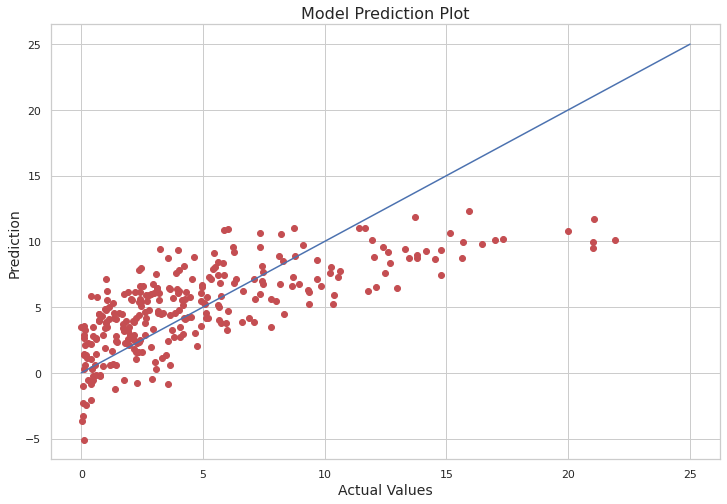

                                                                               
MLR -- Model_Score: 0.5094728279996114 / rmse: 3.1735465117945796/ Latency: 1.7ms
                                                                               


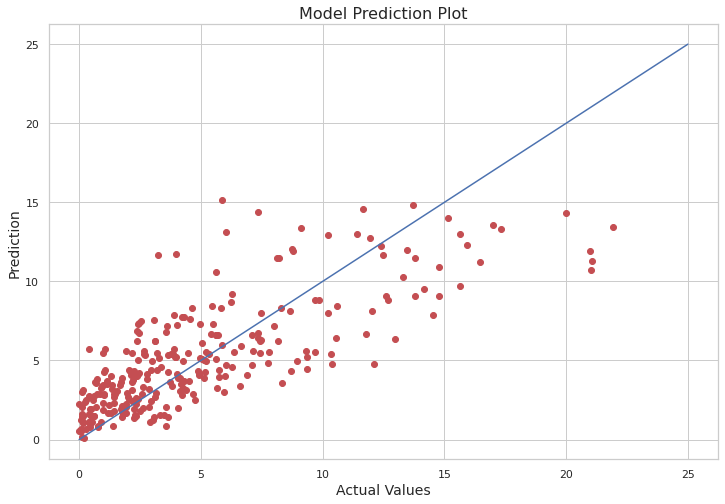

                                                                               
MLP -- Model_Score: 0.6060241982552922 / rmse: 2.8441212487929928/ Latency: 8.1ms
                                                                               


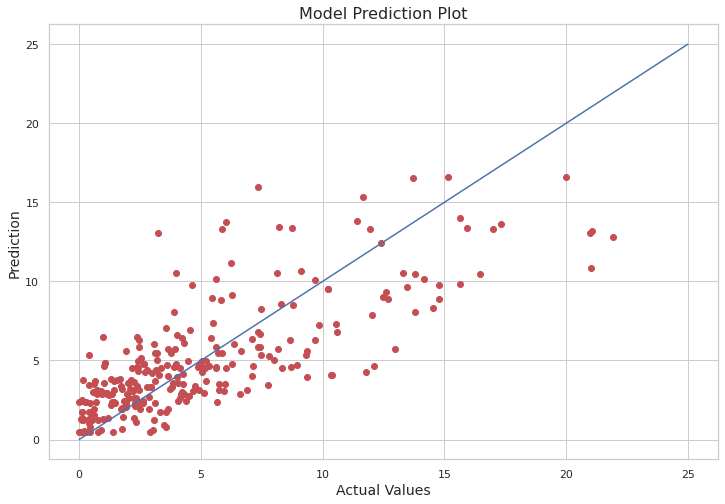

                                                                               
RF -- Model_Score: 0.6059860798690415 / rmse: 2.844258834260959/ Latency: 10.2ms
                                                                               


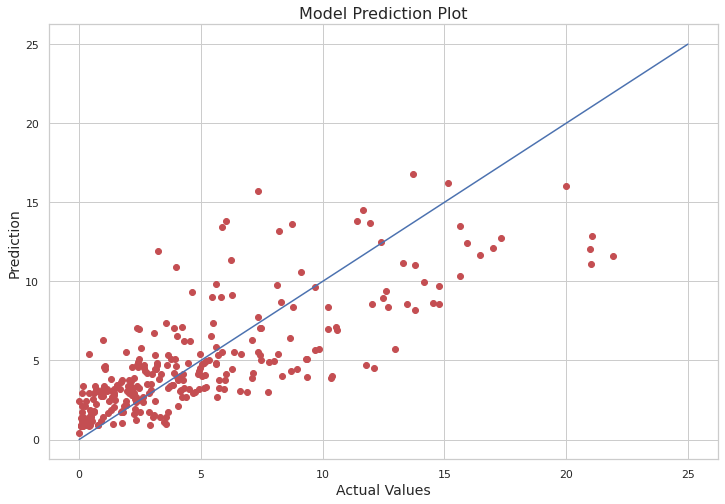

                                                                               
GB -- Model_Score: 0.5960607529868185 / rmse: 2.879859887955004/ Latency: 3.4ms
                                                                               


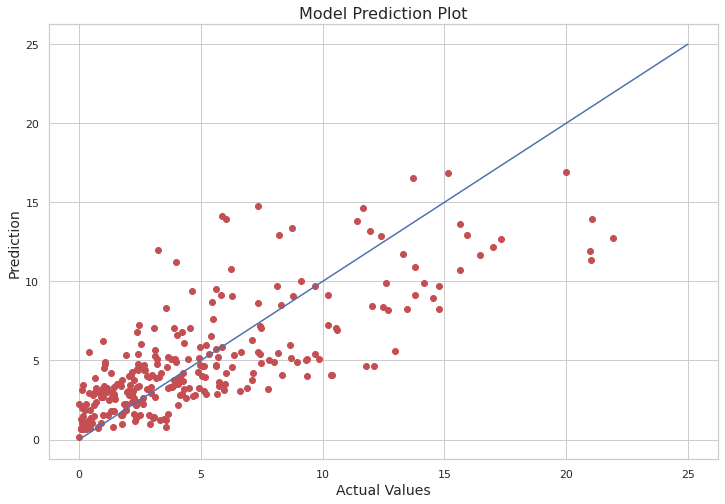

                                                                               
LGBM -- Model_Score: 0.6049087477605453 / rmse: 2.8481446356123037/ Latency: 7.8ms
                                                                               


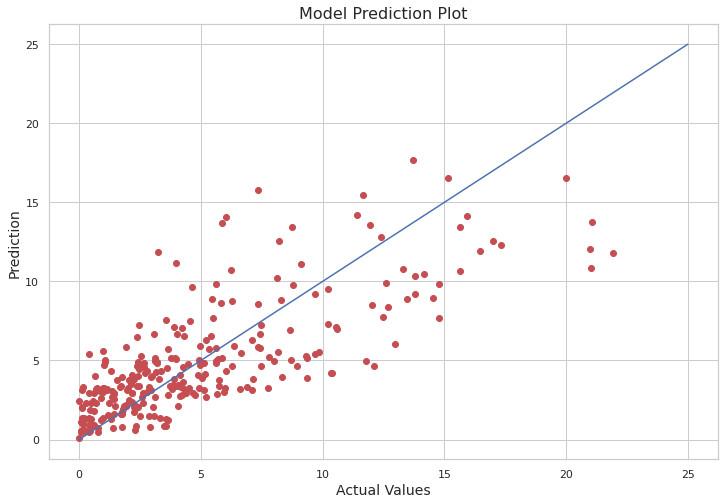

                                                                               
HGBR -- Model_Score: 0.5990197041644612 / rmse: 2.8692926707982296/ Latency: 17.5ms


In [ ]:
for name, mdl in models.items():
    evaluate_model(name, mdl, X_test, y_test)

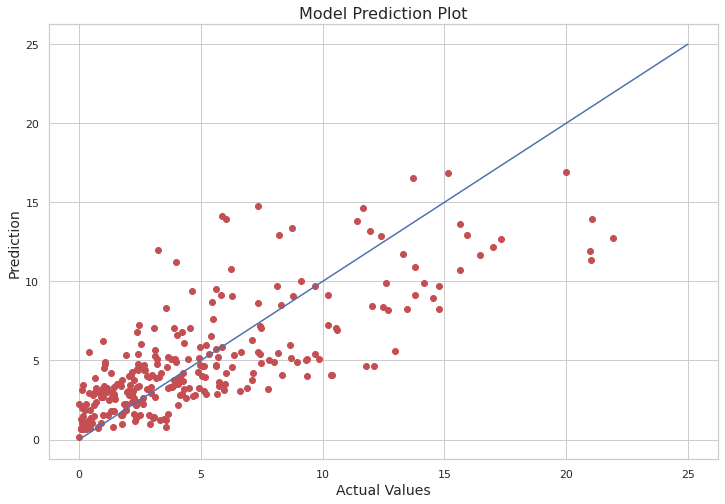

                                                                               
LGBM Regressor -- Model_Score: 0.6049087477605453 / rmse: 2.8481446356123037/ Latency: 17.6ms


In [ ]:
evaluate_model('LGBM Regressor', models['LGBM'], X_test,y_test)

        MLR
0  7.151718
1  4.511059
2  2.407532
3  5.000037
4  2.575573
        MLP
0  6.627828
1  3.449687
2  2.292635
3  3.673872
4  2.216886
         RF
0  6.330265
1  3.818368
2  3.117034
3  2.961388
4  2.142178
         GB
0  6.273888
1  3.215852
2  2.930489
3  3.212841
4  2.193348
       LGBM
0  6.316824
1  3.566206
2  2.901632
3  3.281552
4  1.861642
       HGBR
0  6.282218
1  3.313183
2  2.896749
3  3.214315
4  2.131572


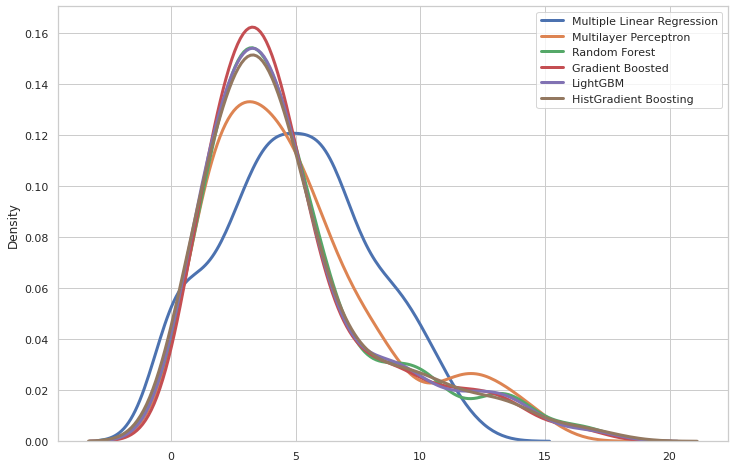

In [ ]:
plt.figure(figsize=(12,8))
for name, mdl in models.items():
    modls =['Multiple Linear Regression','Multilayer Perceptron','Random Forest','Gradient Boosted','LightGBM','HistGradient Boosting']
    predicts = mdl.predict(X_test)
    predicts[predicts<0]=0
    daf = pd.DataFrame({name:predicts})
    print(daf.head(5))
    sn.distplot(predicts, hist=False, kde=True, 
             bins=int(20), 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})
    plt.legend(modls)


        MLR
0  7.151718
1  4.511059
2  2.407532
3  5.000037
4  2.575573
        MLP
0  6.627828
1  3.449687
2  2.292635
3  3.673872
4  2.216886
         RF
0  6.330265
1  3.818368
2  3.117034
3  2.961388
4  2.142178
         GB
0  6.273888
1  3.215852
2  2.930489
3  3.212841
4  2.193348
       LGBM
0  6.316824
1  3.566206
2  2.901632
3  3.281552
4  1.861642
       HGBR
0  6.282218
1  3.313183
2  2.896749
3  3.214315
4  2.131572


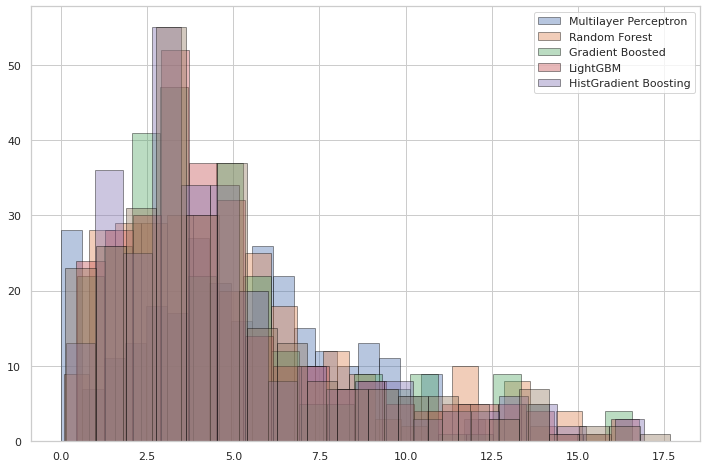

In [ ]:
plt.figure(figsize=(12,8))
for name, mdl in models.items():
    modls =['Multilayer Perceptron','Random Forest','Gradient Boosted','LightGBM','HistGradient Boosting']
    predicts = mdl.predict(X_test)
    predicts[predicts<0]=0
    daf = pd.DataFrame({name:predicts})
    print(daf.head(5))
    sn.distplot(predicts, hist=True, kde=False, 
             bins=int(20), 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})
    plt.legend(modls)

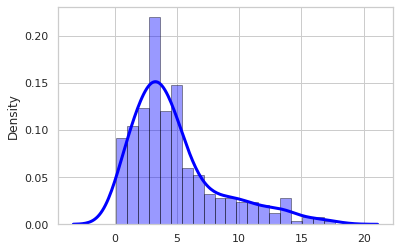

In [ ]:
sn.distplot(daf, hist=True, kde=True, 
             bins=int(20), color = 'blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})

In [ ]:

GB = GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                           init=None, learning_rate=0.01, loss='ls', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=400,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0, warm_start=False)
HGBR = HistGradientBoostingRegressor(l2_regularization=0.0, learning_rate=0.1,
                               loss='least_squares', max_bins=255, max_depth=2,
                               max_iter=100, max_leaf_nodes=31,
                               min_samples_leaf=20, n_iter_no_change=None,
                               random_state=None, scoring=None, tol=1e-07,
                               validation_fraction=0.1, verbose=0,
                               warm_start=False)
LGBM =  LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=3,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=50, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
MLP = MLPRegressor(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
RF = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                       max_depth=4, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=400, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)
MLP.fit(X_train,y_train)
RF.fit(X_train,y_train)
GB.fit(X_train,y_train)
HGBR.fit(X_train,y_train)
LGBM.fit(X_train,y_train)

ACT = y_test
MLP_predicted = MLP.predict(X_test)
RF_predicted = RF.predict(X_test)
GB_predicted = GB.predict(X_test)
HGBR_predicted = HGBR.predict(X_test)
LGBM_predicted = LGBM.predict(X_test)

Text(0.5, 1.0, 'Actual precipitation')

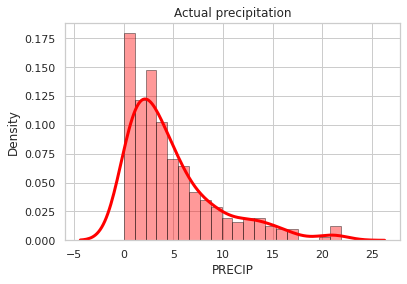

In [ ]:
sn.distplot(ACT, hist=True, kde=True, 
             bins=int(20) , color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})
plt.title('Actual precipitation')

Text(0.5, 1.0, 'MLP Regressor')

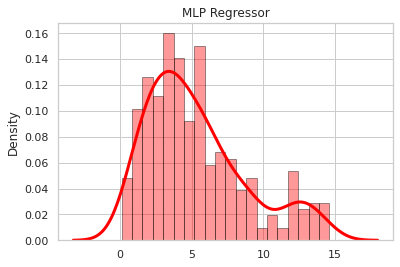

In [ ]:
sn.distplot(MLP_predicted, hist=True, kde=True, 
             bins=int(20),color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})
plt.title('MLP Regressor')

Text(0.5, 1.0, 'RF Regressor')

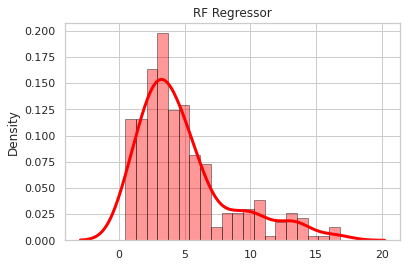

In [ ]:
sn.distplot(RF_predicted, hist=True, kde=True, 
             bins=int(20),color ='red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})
plt.title('RF Regressor')

Text(0.5, 1.0, 'GB Regressor')

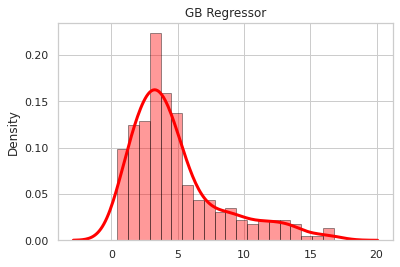

In [ ]:
sn.distplot(GB_predicted, hist=True, kde=True, 
             bins=int(20),color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})
plt.title('GB Regressor')

Text(0.5, 1.0, 'HGBR Regressor')

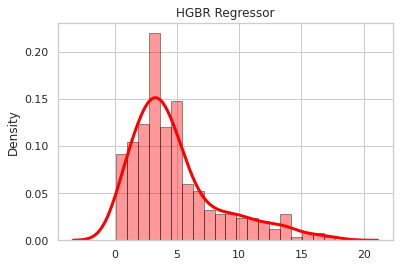

In [ ]:
sn.distplot(HGBR_predicted, hist=True, kde=True, 
             bins=int(20),color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})
plt.title('HGBR Regressor')

Text(0.5, 1.0, 'LGBM Regressor')

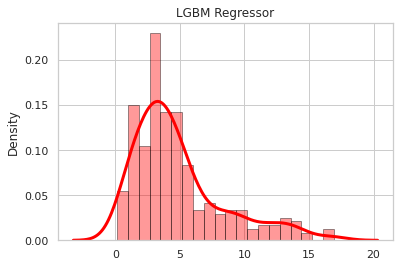

In [ ]:
sn.distplot(LGBM_predicted, hist=True, kde=True, 
             bins=int(20),color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})
plt.title('LGBM Regressor')

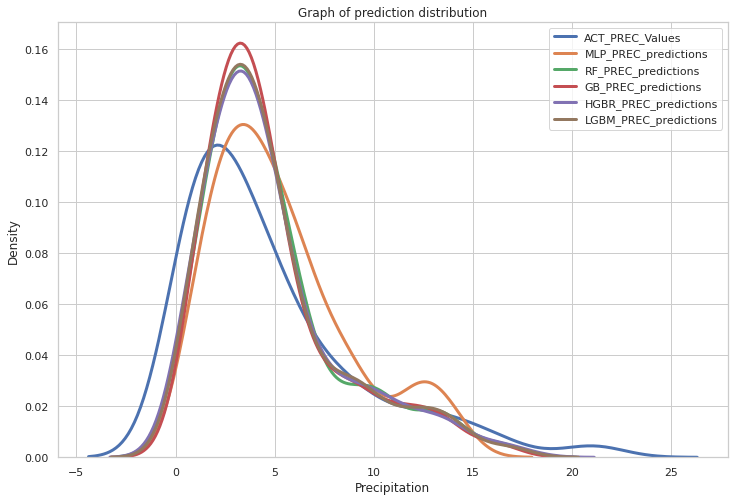

In [ ]:
modls =['ACT_PREC_Values','MLP_PREC_predictions','RF_PREC_predictions','GB_PREC_predictions','HGBR_PREC_predictions','LGBM_PREC_predictions']
predictors = [ACT, MLP_predicted, RF_predicted, GB_predicted, HGBR_predicted, LGBM_predicted]
#print(predictors)
plt.figure(figsize=(12,8))
for modell in predictors:
  modell[modell<0]=0
  sn.distplot(modell, hist=False, kde=True, 
             bins=int(20), 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})
  plt.legend(modls)
  plt.xlabel('Precipitation' )
  plt.title('Graph of prediction distribution')
  plt.show()


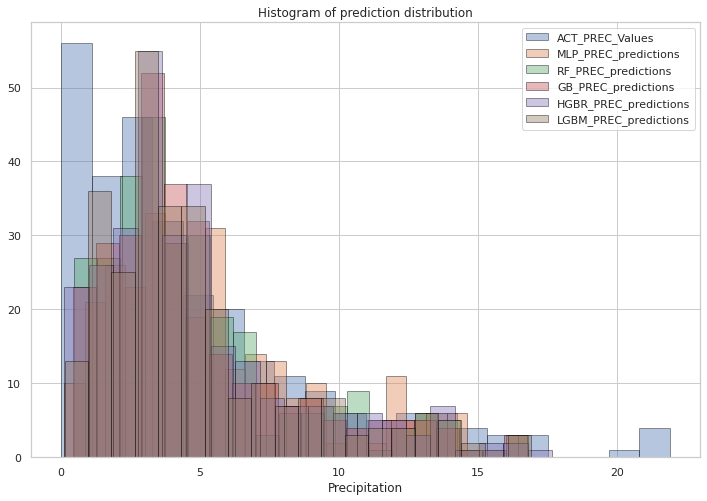

In [ ]:
modls =['ACT_PREC_Values','MLP_PREC_predictions','RF_PREC_predictions','GB_PREC_predictions','HGBR_PREC_predictions','LGBM_PREC_predictions']
predictors = [ACT, MLP_predicted, RF_predicted, GB_predicted, HGBR_predicted, LGBM_predicted]
#print(predictors)
plt.figure(figsize=(12,8))
for modell in predictors:
  modell[modell<0]=0
  sn.distplot(modell, hist=True, kde=False, 
             bins=int(20), 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})
  plt.legend(modls)
  plt.xlabel('Precipitation' )
  plt.title('Histogram of prediction distribution')

## Plotting Results

In [ ]:
cdff1 = cdff.copy()
cdff1.head()

,RH2M,PS,T2M,SST,T2M_MAX,PRECIP
0,64.960,84.834,21.700,27.5790,26.934,4.128
1,62.536,84.954,21.750,28.0790,27.382,0.836
2,67.602,84.892,21.744,28.3800,26.598,3.954
3,66.372,84.864,21.920,28.0525,27.334,5.686
4,57.580,84.876,22.360,27.9575,28.274,0.300


In [ ]:
cdff1.columns

Index(['RH2M', 'PS', 'T2M', 'SST', 'T2M_MAX', 'PRECIP'], dtype='object')

In [ ]:
cdff2 = cdff1.drop('PRECIP',axis = 1)


In [ ]:
cdff3 = scale(cdff2)

In [ ]:
cols = cdff.columns.tolist()
cols.remove('PRECIP')
cdff3 = pd.DataFrame(cdff3, columns=cols, index=df.index)
cdff3 = pd.concat([cdff3, cdff['PRECIP']], axis=1)
df1 = cdff3.copy()
df1.head()

,RH2M,PS,T2M,SST,T2M_MAX,PRECIP
0,-0.102416,-1.788370,0.039613,-1.722925,0.163173,4.128
1,-0.361942,-0.817110,0.079118,-1.098735,0.372637,0.836
2,0.180450,-1.318928,0.074377,-0.722972,0.006076,3.954
3,0.048760,-1.545555,0.213435,-1.131817,0.350194,5.686
4,-0.892557,-1.448429,0.561081,-1.250413,0.789694,0.300


In [ ]:
X = cdff.loc[:, df1.columns != 'PRECIP']
y = cdff.loc[:, 'PRECIP']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
model1 = Sequential()
model1.add(Dense(5, activation= 'relu',kernel_initializer='normal', input_dim=X_train.shape[1]))
model1.add(Dense(3,activation='relu', kernel_initializer='normal'))
model1.add(Dense(1,kernel_initializer='normal'))
print(model1.summary())

model1.compile(loss='mse', optimizer='adam', metrics=['mse'])
history = model1.fit(X_train , y_train, verbose=1, epochs =500 , validation_data =(X_test,y_test))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 30        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 18        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 4         
Total params: 52
Trainable params: 52
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/500
72/72 [==============================] - 14s 8ms/step - loss: 44.5498 - mse: 44.5498 - val_loss: 43.6558 - val_mse: 43.6558
Epoch 2/500
72/72 [==============================] - 0s 2ms/step - loss: 42.5858 - mse: 42.5858 - val_loss: 43.0116 - val_mse: 43.0116
Epoch 3/500
72/72 [==============================] - 0s 2ms/step - loss: 41.4674 - mse: 41.4674 - val_loss: 42.383

In [ ]:
prediction_test1 = model1.predict(X_test)
print('The maximum pentad precipitation average is : ', max(prediction_test1))
print(len(prediction_test1))

The maximum pentad precipitation average is :  [4.7728505]
570


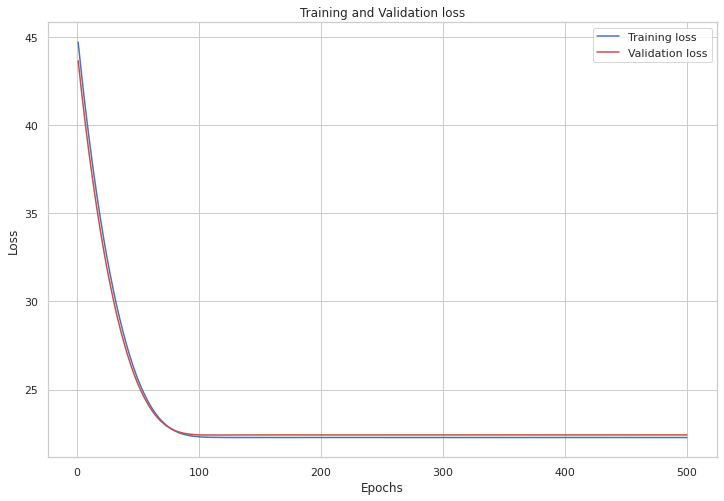

In [ ]:
loss = history.history['loss']
val_loss = history.history ['val_loss']
epochs = range(1,len(loss)+1)
plt.figure(figsize=(12,8))
plt.plot(epochs, loss, 'b', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
train_pred = model1.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
test_pred = model1.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
print("Train RMSE: {:0.2f}".format(train_rmse))
print("Test RMSE: {:0.2f}".format(test_rmse))

Train RMSE: 4.72
Test RMSE: 4.74


## Predictions

In [ ]:
print(X_test)

        RH2M      PS     T2M      SST  T2M_MAX
1493  66.990  85.174  21.248  29.5285   25.278
201   66.894  85.020  21.284  27.0030   26.096
2594  69.002  85.304  20.214  29.2575   24.818
2201  55.198  84.866  23.446  29.0195   29.774
1755  50.616  84.932  24.326  27.6635   30.598
...      ...     ...     ...      ...      ...
885   66.766  85.038  21.622  28.6450   25.982
2103  75.376  85.026  20.458  29.1880   24.404
1069  74.710  85.104  19.748  27.7640   23.450
1241  43.276  84.954  23.514  28.4720   30.194
487   61.038  85.046  21.602  29.5705   26.512

[570 rows x 5 columns]


In [ ]:
ss = pd.read_csv('/content/gdrive/MyDrive/pred.csv')
print(ss.shape)
ss.head()

(570, 2)


,ID,PRECIP
0,ID_AAcismbB,0
1,ID_AAeBMsji,0
2,ID_AAjFMjzy,0
3,ID_AAmMOEEC,0
4,ID_ABguzDxp,0


In [ ]:
ss['PRECIP'] = model1.predict(X_test) 
ss.head(20)

,ID,PRECIP
0,ID_AAcismbB,4.772851
1,ID_AAeBMsji,4.772851
2,ID_AAjFMjzy,4.772851
3,ID_AAmMOEEC,4.772851
4,ID_ABguzDxp,4.772851
5,ID_ABomWihE,4.772851
6,ID_ACDBDjVC,4.772851
7,ID_AEnEBaEk,4.772851
8,ID_AFDiXCWE,4.772851
9,ID_AFFdlZrY,4.772851


In [ ]:
Actual_values = y_test[0:20]
Actual_values

1493     1.980
201      5.528
2594     1.592
2201     0.590
1755     2.208
1003     4.772
2520     1.446
166      9.194
1753     0.212
2490     0.040
2531     0.394
2238     2.018
717      3.822
2342     0.240
2771    17.214
1014     4.894
1685    12.254
428      9.508
49       3.604
1182     4.316
Name: PRECIP, dtype: float64

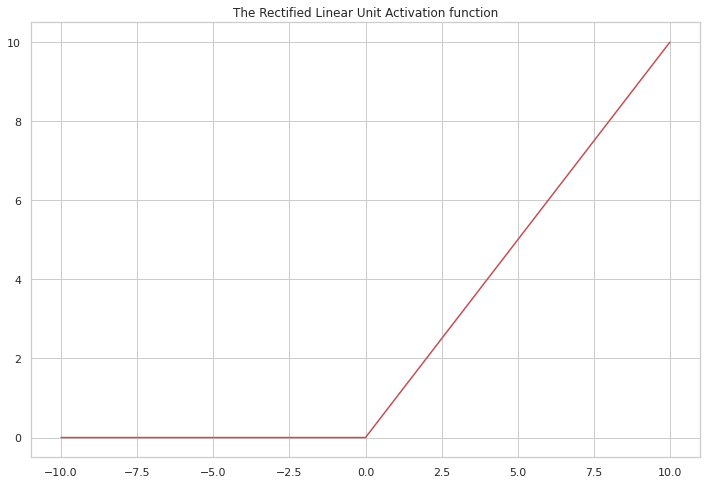

In [ ]:
# plot inputs and outputs
from matplotlib import pyplot

# rectified linear function
def rectified(x):
	return max(0.0, x)

# define a series of inputs
series_in = [x for x in range(-10, 11)]
# calculate outputs for our inputs
series_out = [rectified(x) for x in series_in]
# line plot of raw inputs to rectified outputs
plt.figure(figsize=(12,8))
pyplot.plot(series_in, series_out,'r')
plt.title('The Rectified Linear Unit Activation function')
pyplot.show()

## Stacking Regression

>knn -2.312 (0.368)
>cart -2.786 (0.415)
>svm -2.292 (0.398)
>stacking -2.218 (0.303)


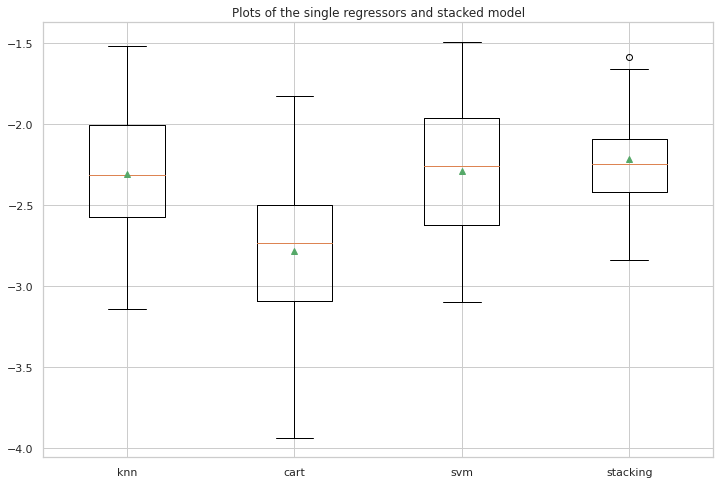

In [ ]:
# compare ensemble to each standalone models for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
from matplotlib import pyplot


# get a stacking ensemble of models
def get_stacking():
	# define the base models
	level0 = list()
	level0.append(('knn', KNeighborsRegressor()))
  #level0.append(('ann', MLPRegressor()))
	level0.append(('cart', DecisionTreeRegressor()))
	level0.append(('svm', SVR()))
	# define meta learner model
	level1 = LinearRegression()
	# define the stacking ensemble
	model2 = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
	return model2

# get a list of models to evaluate
def get_models():
	models = dict()
	models['knn'] = KNeighborsRegressor()
  #models['mlp'] = MLPRegressor()
	models['cart'] = DecisionTreeRegressor()
	models['svm'] = SVR()
	models['stacking'] = get_stacking()
	return models

# evaluate a given model using cross-validation
def evaluate_model(model2, X, y):
	cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
	scores = cross_val_score(model2, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
	return scores

# define dataset
X = cdff.loc[:, cdff.columns != 'PRECIP']
y = cdff.loc[:, 'PRECIP']
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model2 in models.items():
	scores = evaluate_model(model2, X_test, y_test)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
plt.figure(figsize=(12,8))
plt.boxplot(results, labels=names, showmeans=True)
plt.title("Plots of the single regressors and stacked model")
plt.show()